<a href="https://colab.research.google.com/github/arkeodev/time-series/blob/main/Time_Series_Analysis_with_Deep_Learning/Deep_Learning_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\begin{array}{c}
\text{$\Large That\ which\ is\ not\ good\ for\ the\ beehive,\ cannot\ be\ good\ for\ the\ bee.$} \\
{\text{$\small Marcus\ Aurelius$}} \\
\end{array}
$$

# Time Series Analysis Using Deep Learning - LSTM and CNN

## Introduction

### Understanding Different Types of Neural Networks

Neural networks are at the heart of many modern machine learning applications. These networks are generally categorized based on their architecture and the specific problems they are designed to solve. The most common types include:

1. **Feedforward Neural Networks:** These are the simplest type of artificial neural network. In this architecture, the information moves in only one direction—forward—from the input nodes, through the hidden nodes (if any), and to the output nodes. There are no cycles or loops in the network, which makes this type ideal for straightforward prediction and classification tasks where the sequence of data is not important.

2. **Convolutional Neural Networks (CNNs):** Highly effective in areas such as image recognition and classification, CNNs automatically detect important features without any human supervision. Their architecture leverages the hierarchical pattern in data and assembles more complex patterns using smaller and simpler patterns.

3. **Recurrent Neural Networks (RNNs):** In contrast to feedforward neural networks, which process inputs in a straightforward, one-way manner, Recurrent Neural Networks (RNNs) are designed with loops in their architecture, allowing information to persist. This looping mechanism enables RNNs to exhibit dynamic temporal behavior, making them uniquely suited for processing sequences of data over time. By maintaining a form of memory through recurrent connections, RNNs can effectively use historical data to influence current outputs, which is beneficial in applications such as time series analysis, speech recognition, language modeling, and any other context where the order and context of data points are critical.

### Long Short-Term Memory (LSTM) Networks

<figure>
    <img src="https://raw.githubusercontent.com/arkeodev/time-series/main/Time_Series_Analysis_with_Deep_Learning/images/lstm_cell.png" width="500" height="300" alt="LSTM Cell">
    <figcaption>LSTM Cell</figcaption>
</figure>

Among various RNN architectures, Long Short-Term Memory networks stand out for their effectiveness in avoiding the long-term dependency problem. Traditional RNNs struggle to learn connections from inputs that occurred many steps ago in the input sequence, due to issues like vanishing or exploding gradients. LSTM networks solve this problem through their unique structure of gates that regulate the flow of information.

**Understanding the Vanishing Gradient Problem**

In traditional RNNs, during the backpropagation phase used for training, gradients of the loss function are propagated backwards in time to update the weights. As these gradients are propagated, they are multiplied by the derivative of the activation function at each timestep. If the derivatives are small (less than 1), the gradients can shrink exponentially as they are propagated back through the timesteps, becoming infinitesimally small. This phenomenon is known as the vanishing gradient problem. It leads to a scenario where the weights of the RNN are not updated effectively, causing the earlier layers to learn very slowly, if at all. This is particularly problematic when dealing with long input sequences where the network needs to remember information from early inputs to predict later ones.

**LSTM Architecture to the Rescue**

LSTMs tackle the vanishing gradient problem through their unique cell structure, which includes three types of gates: the forget gate, the input gate, and the output gate. Each gate in an LSTM cell regulates the flow of information in a way that maintains the cell state across long sequences, thereby mitigating the risk of vanishing gradients:

- **Forget Gate:** Decides which information is irrelevant and can be thrown away, which helps in optimizing the memory of the network by keeping only useful data.
- **Input Gate:** Allows the addition of incoming new information to the cell state, carefully screened through a sigmoid function that decides which values will be updated.
- **Output Gate:** Determines what the next hidden state should be, which not only impacts the current output but also influences the next time step.

## Mathematical Foundations

<figure>
    <img src="https://raw.githubusercontent.com/arkeodev/time-series/main/Time_Series_Analysis_with_Deep_Learning/images/mathematical_formulas_of_lstm.png" width="700" height="300" alt="LSTM Formulas">
    <figcaption>LSTM Formulas</figcaption>
</figure>

Each gate in the LSTM has a specific role: deciding what to forget (forget gate), what new information to store (input gate), and what to output (output gate). The cell state acts as a long-term memory, while the hidden state conveys short-term information. This intricate gating mechanism allows LSTMs to capture temporal dependencies and handle the vanishing gradient problem effectively.

1. **Forget Gate ( $f_t$ ):**
   - **Mathematical Expression:** $f_t = \sigma_g(W_f x_t + U_f h_{t-1} + b_f)$
   - **Contextual Meaning:** This gate decides what information is discarded from the cell state. It uses the sigmoid function $\sigma_g$, which outputs values between 0 and 1. The output of the forget gate $f_t$ is obtained by applying the sigmoid function to a combination of the current input $x_t$, the previous hidden state $h_{t-1}$, and a bias term $b_f$. If $f_t$ is close to 0, it indicates that the cell state should forget the corresponding information; if it is close to 1, it should retain the information.

2. **Input Gate ( $i_t$ ):**
   - **Mathematical Expression:** $i_t = \sigma_g(W_i x_t + U_i h_{t-1} + b_i)$
   - **Contextual Meaning:** This gate controls the flow of new information into the cell state. Similar to the forget gate, it takes the current input $x_t$, the previous hidden state $h_{t-1}$, applies the weights $W_i, U_i$, adds a bias $b_i$, and then applies the sigmoid function. The output $i_t$ indicates which values will be updated in the cell state.

3. **Output Gate ( $o_t$ ):**
   - **Mathematical Expression:** $o_t = \sigma_g(W_o x_t + U_o h_{t-1} + b_o)$
   - **Contextual Meaning:** The output gate determines which parts of the cell state make it to the output. It again uses the current input, the previous hidden state, their respective weights, and a bias term, all passed through a sigmoid function. The values close to 1 in the output $o_t$ indicate that this information should be included in the output hidden state $h_t$.

4. **Cell State Update ( $c_t$ ):**
   - **Mathematical Expression:** $c_t = f_t \odot c_{t-1} + i_t \odot \sigma_c(W_c x_t + U_c h_{t-1} + b_c)$
   - **Contextual Meaning:** The cell state $c_t$ is updated by combining the old state $c_{t-1}$ with the new candidate values, which are scaled by how much we decided to update each state value. The $\odot$ denotes element-wise multiplication. The function $\sigma_c$ is typically the hyperbolic tangent function, which outputs values between -1 and 1. This allows the network to increase or decrease the state value or keep it constant.

5. **Hidden State Output ( $h_t$ ):**
   - **Mathematical Expression:** $h_t = o_t \odot \sigma_h(c_t)$
   - **Contextual Meaning:** The hidden state for the current timestep $h_t$ is calculated by filtering the cell state $c_t$ through the output gate $o_t$. The function $\sigma_h$ here is again usually a hyperbolic tangent function, allowing the hidden state to carry values between -1 and 1. The output hidden state is influenced by the cell's memory and the current input, balancing the information from the past and present.

## Implementing Time Series Forecasting in PyTorch

### Prepare the Environment

In [1]:
# Necessary imports
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Data Preprocessing

#### Loading the dataset

In [3]:
# Load dataset
data_url = "https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv"
df = pd.read_csv(data_url)
print(df.columns)
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head()

Index(['Month', '#Passengers'], dtype='object')


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Visualizing the trend and seasonality

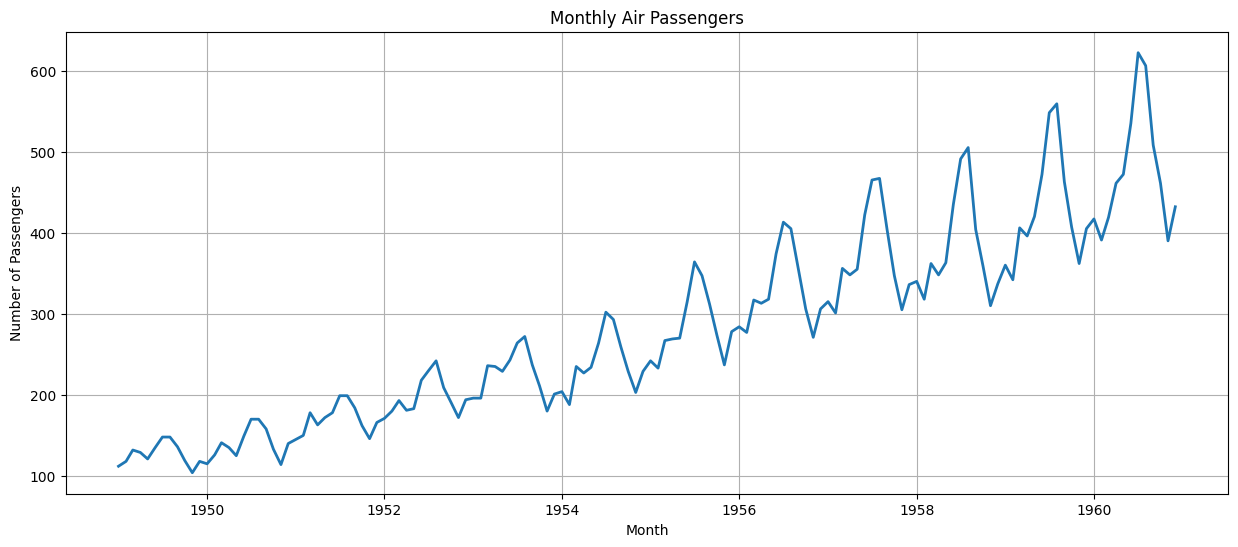

In [4]:
# Plot the series to see Trend and Seasonality
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Passengers'], label="Passengers", color='tab:blue', linewidth=2)
plt.title('Monthly Air Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

In [5]:
def transform_dataset(data, input_window, forecast_horizon):
    """
    Transforms time series data into a format suitable for sequence to sequence learning.
    
    Args:
        data (DataFrame): The original DataFrame containing the time series data.
        input_window (int): Number of past observations to use for predicting the future.
        forecast_horizon (int): Number of future observations to predict.
    
    Returns:
        DataFrame: Transformed DataFrame with input and output sequences.
    """
    # Initialize the DataFrame to store the inputs (x) and outputs (y)
    transformed_data = pd.DataFrame(index=data.index)
    
    # Create input features (lags of the original series)
    for i in range(input_window):
        transformed_data[f'x_{i}'] = data.iloc[:, 0].shift(-i)  # Using the first column by position
    
    # Create output labels (future values of the series)
    for j in range(forecast_horizon):
        transformed_data[f'y_{j}'] = data.iloc[:, 0].shift(-(input_window + j))  # Using the first column by position
    
    # Remove rows with any NaN values to maintain consistent data batches
    transformed_data = transformed_data.dropna()
    
    return transformed_data

# Configuration
input_window = 12  # Number of lagged entries to consider
forecast_horizon = 6  # Number of future steps to predict

# Transform the dataset
full_data = transform_dataset(df, input_window, forecast_horizon)
print("Transformed data length:", len(full_data))
print(full_data.head(3))

# Extract features and targets
X_cols = [col for col in full_data.columns if col.startswith('x')]
y_cols = [col for col in full_data.columns if col.startswith('y')]
X = full_data[X_cols].values
y = full_data[y_cols].values

# Print shapes of features and targets
print("Features shape:", X.shape, "Targets shape:", y.shape)

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape(X_train.shape[0], input_window, 1)  # Reshape for LSTM input
X_test = X_test.reshape(X_test.shape[0], input_window, 1)

# Print the shapes of the training and testing data
print("\n\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Transformed data length: 127
            x_0    x_1    x_2    x_3    x_4    x_5    x_6    x_7    x_8  \
Month                                                                     
1949-01-01  112  118.0  132.0  129.0  121.0  135.0  148.0  148.0  136.0   
1949-02-01  118  132.0  129.0  121.0  135.0  148.0  148.0  136.0  119.0   
1949-03-01  132  129.0  121.0  135.0  148.0  148.0  136.0  119.0  104.0   

              x_9   x_10   x_11    y_0    y_1    y_2    y_3    y_4    y_5  
Month                                                                      
1949-01-01  119.0  104.0  118.0  115.0  126.0  141.0  135.0  125.0  149.0  
1949-02-01  104.0  118.0  115.0  126.0  141.0  135.0  125.0  149.0  170.0  
1949-03-01  118.0  115.0  126.0  141.0  135.0  125.0  149.0  170.0  170.0  
Features shape: (127, 12) Targets shape: (127, 6)


Training data shape: (101, 12, 1)
Testing data shape: (26, 12, 1)


#### Transform data for sequence

In [6]:
seq_length = 12  # Using 12 months history

In [7]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add an extra dimension for y
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)  # Add an extra dimension for y
print(f"X Train Tensor's shape: {X_train_tensor.shape}")
print(f"y Train Tensor's shape: {y_train_tensor.shape}")
print(f"X Test Tensor's shape: {X_test_tensor.shape}")
print(f"y Test Tensor's shape: {y_test_tensor.shape}")

X Train Tensor's shape: torch.Size([101, 12, 1])
y Train Tensor's shape: torch.Size([101, 1, 6])
X Test Tensor's shape: torch.Size([26, 12, 1])
y Test Tensor's shape: torch.Size([26, 1, 6])


### Model Architecture

Constructing a neural network model using convolutional and LSTM layers. CNN layers can help in identifying hierarchical patterns in the series data, while LSTM layers are effective at capturing long-term dependencies essential for accurate predictions in time series analysis.

In [8]:
class CNNLSTM(nn.Module):
    def __init__(self):
        super(CNNLSTM, self).__init__()
        self.conv1 = nn.Conv1d(1, 6, kernel_size=5, padding=2)  # Convolutional layer
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(6, 6, batch_first=True)  # LSTM layer
        self.dense = nn.Linear(6, 6)  # Adjusted to output 6 values

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Correctly permute dimensions for Conv1D
        x = self.conv1(x)
        x = self.relu(x)
        x = x.permute(0, 2, 1)  # Permute back for LSTM
        x, _ = self.lstm(x)
        x = self.relu(x)
        x, _ = self.lstm(x)
        x = self.relu(x)
        x = self.dense(x[:, -1, :])  # Apply dense layer to last LSTM output
        return x

In [9]:
def print_model_summary(model):
    print("Model Summary:\n")
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad:
            continue
        param = parameter.numel()
        total_params += param
        print(f"{name}: shape={parameter.size()}, number of params={param}")
    print(f"\nTotal number of parameters in the model: {total_params}")

# Create an instance of the model
model = CNNLSTM()
model = model.to(device)

# Print the model summary
print_model_summary(model)

Model Summary:

conv1.weight: shape=torch.Size([6, 1, 5]), number of params=30
conv1.bias: shape=torch.Size([6]), number of params=6
lstm.weight_ih_l0: shape=torch.Size([24, 6]), number of params=144
lstm.weight_hh_l0: shape=torch.Size([24, 6]), number of params=144
lstm.bias_ih_l0: shape=torch.Size([24]), number of params=24
lstm.bias_hh_l0: shape=torch.Size([24]), number of params=24
dense.weight: shape=torch.Size([6, 6]), number of params=36
dense.bias: shape=torch.Size([6]), number of params=6

Total number of parameters in the model: 414


### Training the Model

In [10]:
# Initialize loss function, and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Training the model function
def train_model(model, criterion, optimizer, X_train, y_train, X_test, y_test, num_epochs=50):
    history = {'train_loss': [], 'val_loss': []}
    
    for epoch in range(num_epochs):
        model.train()
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        # Track training loss
        history['train_loss'].append(loss.item())
        
        # Validation loss
        model.eval()
        with torch.no_grad():
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            test_preds = model(X_test)
            test_loss = criterion(test_preds, y_test)
            history['val_loss'].append(test_loss.item())
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}/{num_epochs} Train loss: {loss.item():.4f} Test loss: {test_loss.item():.4f}')
    
    return history

hist_cnn_lstm = train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, num_epochs=1000)


/Users/kenanagyel/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([101, 1, 6])) that is different to the input size (torch.Size([101, 6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/kenanagyel/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([26, 1, 6])) that is different to the input size (torch.Size([26, 6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0/1000 Train loss: 73536.8672 Test loss: 199872.9531
Epoch 10/1000 Train loss: 73531.1641 Test loss: 199863.1719
Epoch 20/1000 Train loss: 73525.0469 Test loss: 199852.6719
Epoch 30/1000 Train loss: 73518.3047 Test loss: 199841.0312
Epoch 40/1000 Train loss: 73510.4219 Test loss: 199827.0938
Epoch 50/1000 Train loss: 73497.5234 Test loss: 199804.2656
Epoch 60/1000 Train loss: 73484.9531 Test loss: 199782.8906
Epoch 70/1000 Train loss: 73469.4062 Test loss: 199756.0156
Epoch 80/1000 Train loss: 73444.4141 Test loss: 199711.6250
Epoch 90/1000 Train loss: 73416.3594 Test loss: 199662.2812
Epoch 100/1000 Train loss: 73379.2422 Test loss: 199596.9688
Epoch 110/1000 Train loss: 73330.1875 Test loss: 199510.8125
Epoch 120/1000 Train loss: 73267.1953 Test loss: 199400.8906
Epoch 130/1000 Train loss: 73186.8359 Test loss: 199261.9375
Epoch 140/1000 Train loss: 73105.7266 Test loss: 199124.9531
Epoch 150/1000 Train loss: 73040.0312 Test loss: 199014.3906
Epoch 160/1000 Train loss: 72980.98

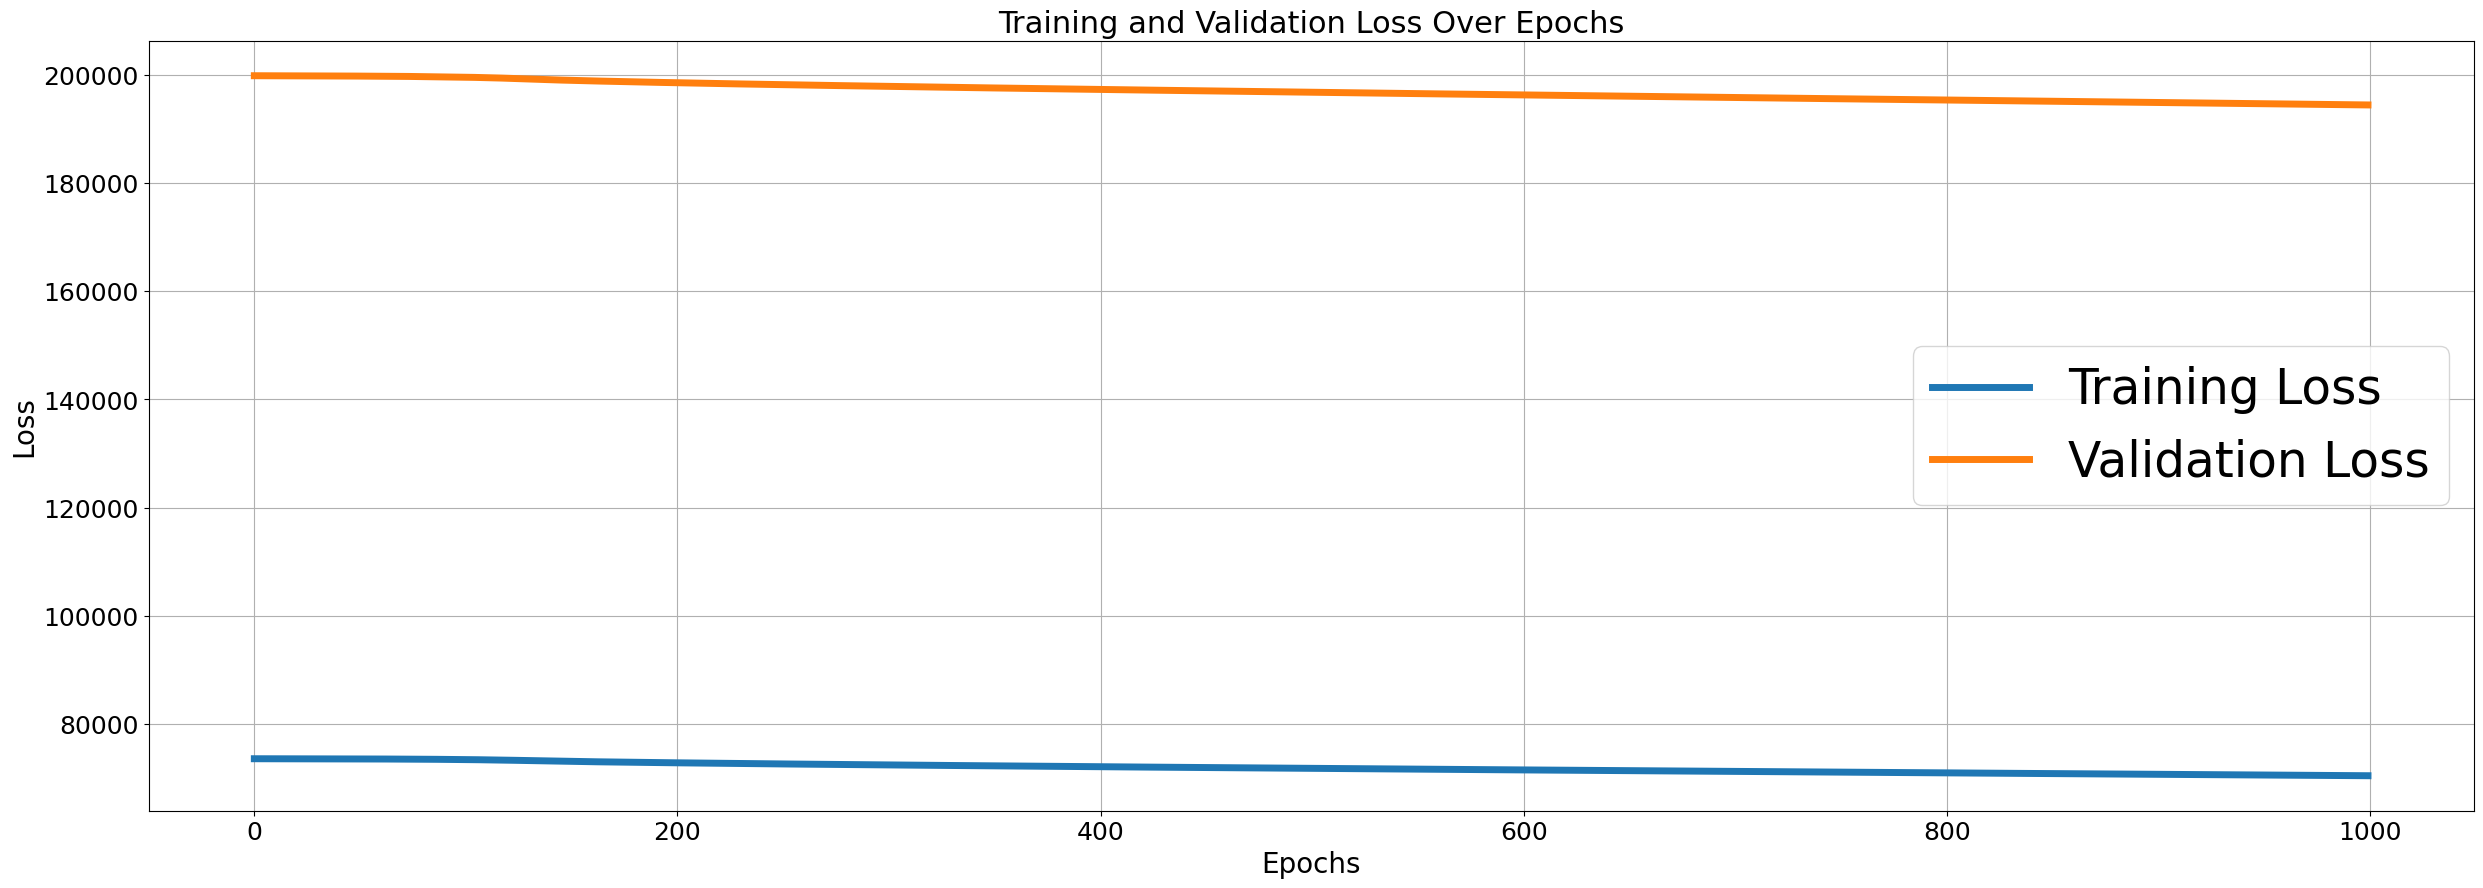

In [12]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 18})

# Plotting both training and validation loss
plt.plot(hist_cnn_lstm['train_loss'], label='Training Loss', lw=5)
plt.plot(hist_cnn_lstm['val_loss'], label='Validation Loss', lw=5)

plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Loss", fontsize=20)
plt.title("Training and Validation Loss Over Epochs", fontsize=22)

plt.legend(fontsize=35)
plt.grid(True)
plt.show()

### Model Prediction

#### Prediction

In [13]:
# Combine the training and test data back into a complete set
X_complete = torch.cat((X_train_tensor, X_test_tensor), 0)
y_complete = torch.cat((y_train_tensor, y_test_tensor), 0)

# Make sure the model is in evaluation mode
model.eval()

# Get predictions from the model
with torch.no_grad():
    y_pred_tensor = model(X_complete)

# Convert predictions back to numpy for plotting and manipulation
y_pred = y_pred_tensor.unsqueeze(1).numpy()
y_true = y_complete.numpy()
print(f"y_pred Tensor's shape: {y_pred.shape}")
print(f"y_true Tensor's shape: {y_true.shape}")
print(y_pred)


y_pred Tensor's shape: (127, 1, 6)
y_true Tensor's shape: (127, 1, 6)
[[[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.705499  6.64553  ]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.453146  6.103901  6.3048086 6.105176  6.7054996 6.6455307]]

 [[5.4

#### Visualization

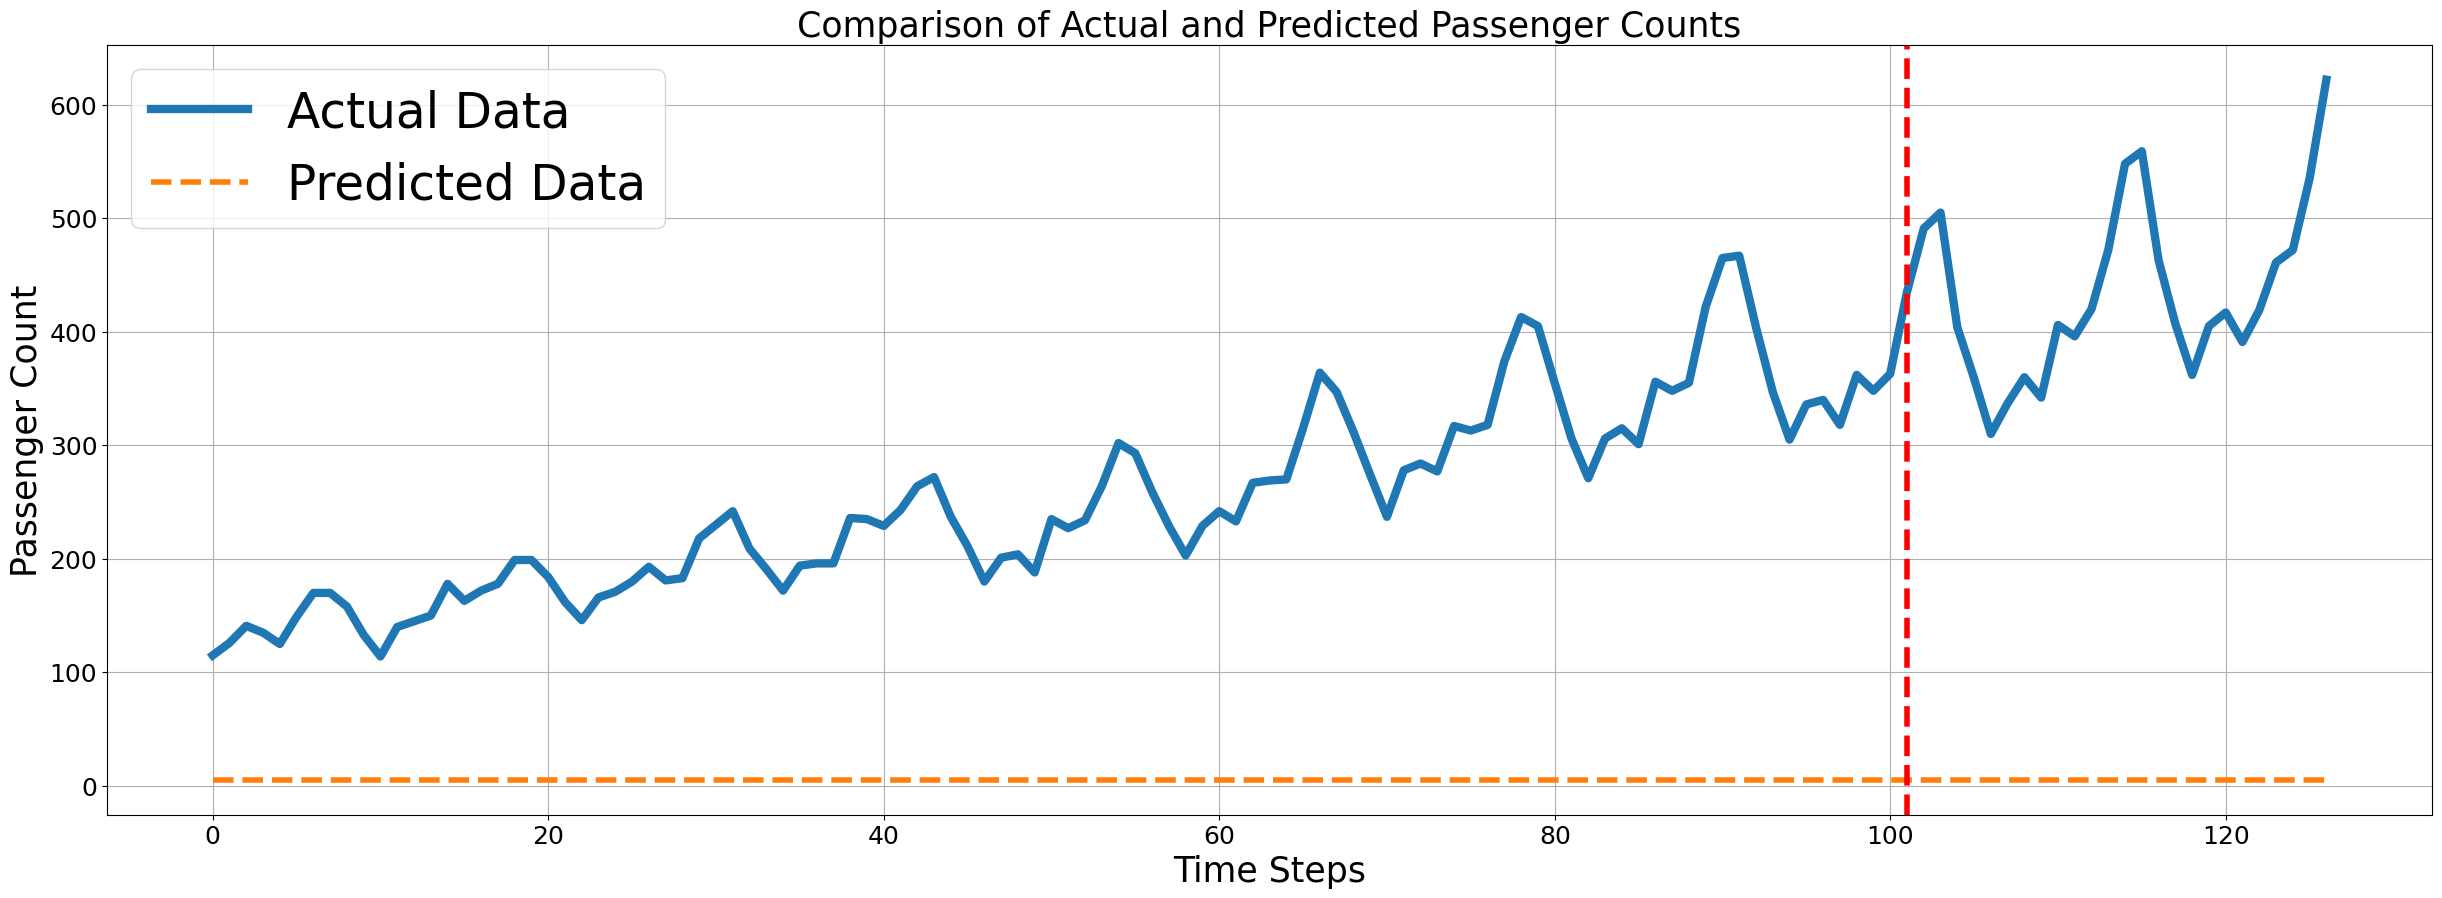

In [16]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 18})

# Generate time axis for the entire dataset
time_steps = np.arange(len(y_true))

# Plot actual data
plt.plot(time_steps, y_true[:, 0, 0], label='Actual Data', lw=6)  # Adjust indexing based on your data shape

# Plot predictions
plt.plot(time_steps, y_pred[:, 0, 0], label='Predicted Data', lw=4, linestyle='dashed')  # Adjust as needed

# Add a vertical line to indicate the training/test split
plt.axvline(x=len(X_train_tensor), color='r', linestyle='dashed', lw=4)

plt.xlabel('Time Steps', fontsize=25)
plt.ylabel('Passenger Count', fontsize=25)
plt.title('Comparison of Actual and Predicted Passenger Counts', fontsize=25)
plt.legend(fontsize=35)
plt.grid(True)
plt.show()


## Conclusion

The integration of LSTM and CNN models offers substantial advantages for time series analysis. LSTMs excel in capturing long-term dependencies thanks to their unique gating mechanisms, which mitigate the vanishing gradient problem and selectively remember important information. CNNs complement this by efficiently extracting spatial hierarchies and patterns from data, making them especially useful in handling large datasets with complex, layered features.

The combination of these models into hybrid architectures leverages the strengths of both, resulting in enhanced feature learning and predictive performance. This approach not only improves model robustness but also reduces the need for manual feature engineering.

## References and Further Reading

- **Colah's Blog on LSTM Networks:** Chris Olah’s blog provides an intuitive and in-depth explanation of LSTMs, making complex concepts accessible without requiring extensive mathematical background. ([Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/))
- **Coursera - Sequence Models Course by DeepLearning.AI:** This course, taught by Andrew Ng, offers practical insights into the use of LSTMs, CNNs, and more for sequence modeling, suitable for applications in natural language processing and other areas.
- **Deep-Learning for Time Series Forecasting: LSTM and CNN Neural Network:** https://medium.com/@sandha.iitr/deep-learning-for-time-series-forecasting-lstm-and-cnn-neur-4c934cb16707